# Задача

Школа `N` имеет сильный состав
для соревнования в прыжках в длину.
В ней есть несколько сильных спортсменов,
но на соревнования нужно отправить одного.
Тренер Максим вычитал из книги, 
что длина прыжка имеет нормальное распределение,
поэтому тренер решил выбрать лучшего школьника
на основании оценки матожидания длины прыжка.
Предполагая, что длины прыжков одного спортсмена
независимы и имеют одинаковое для одного спортсмена распределение,
помогите Максиму составить оценку этой величины
для каждого студента.

Статистическая модель:
$$
\mathcal{X} = \mathbb{R}^n,
\quad \mathcal{P} 
= \left\{\mathbb{P}_{\mu,\sigma}^n 
\mid \mu \in \mathbb{R}, \sigma > 0\right\},
$$
где $\mathbb{P}_{\mu,\sigma}$ - вероятностная мера
нормального распределения со средним $\mu$ и дисперсией $\sigma^2$.
Тогда
$$
(X_1, \ldots, X_n) = X \in \mathcal{X}
$$
выборка из н.о.р. величин $\mathcal{N}(\mu, \sigma^2)$.
Цель - найти параметр $\mu$.

Так как $\mathbb{E} X_1 = \mu$,
то нужно оценить матожидание,
для чего подходит выборочное среднее $\overline{X}$.

In [ ]:
import numpy as np
import plotly.graph_objects as go

from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot as plt

In [ ]:
def solution(x: np.array) -> float:
    return x.mean()

## Проверка несмещённости

In [ ]:
mu = 250
sigma = 10

iter_size = 1000
sample_size = 5

fig = go.Figure()
fig.add_trace(go.Scatter(x=[1, iter_size], 
                         y=[mu, mu], 
                         name="Заданное значение"))

x = norm(loc=mu, scale=sigma).rvs(size=[iter_size, sample_size])
mu_est_list = []
mean_mu_est_list = []

for i in range(iter_size):
    mu_est = solution(x[i])
    mu_est_list.append(mu_est)

    mean_mu_est = sum(mu_est_list) / len(mu_est_list)
    mean_mu_est_list.append(mean_mu_est)

fig.add_trace(go.Scatter(x=1 + np.arange(iter_size), 
                         y=mean_mu_est_list, 
                         name="Среднее оценки"))

fig.update_xaxes(type="log")
fig.update_layout(title="Проверка несмещённости оценки",
                  xaxis_title="Размер выборки",
                  yaxis_title="Значение параметра")
fig.show()

## Проверка состоятельности

In [ ]:
mu = 250
sigma = 10

sample_size = 1000

fig = go.Figure()
fig.add_trace(go.Scatter(x=[1, sample_size], 
                         y=[mu, mu], 
                         name="Заданное значение"))

x = norm(loc=mu, scale=sigma).rvs(size=sample_size)
mu_est_list = []
absolute_error_list = []

for i in range(1, sample_size+1):
    x_ = x[:i] if i < sample_size else x
    mu_est = solution(x_)
    mu_est_list.append(mu_est)

fig.add_trace(go.Scatter(x=1 + np.arange(sample_size), 
                         y=mu_est_list, 
                         name="Оценка"))

fig.update_xaxes(type="log")
fig.update_layout(title="Проверка состоятельности оценки",
                  xaxis_title="Размер выборки",
                  yaxis_title="Значение параметра")
fig.show()

## Проверка асимптотической нормальности

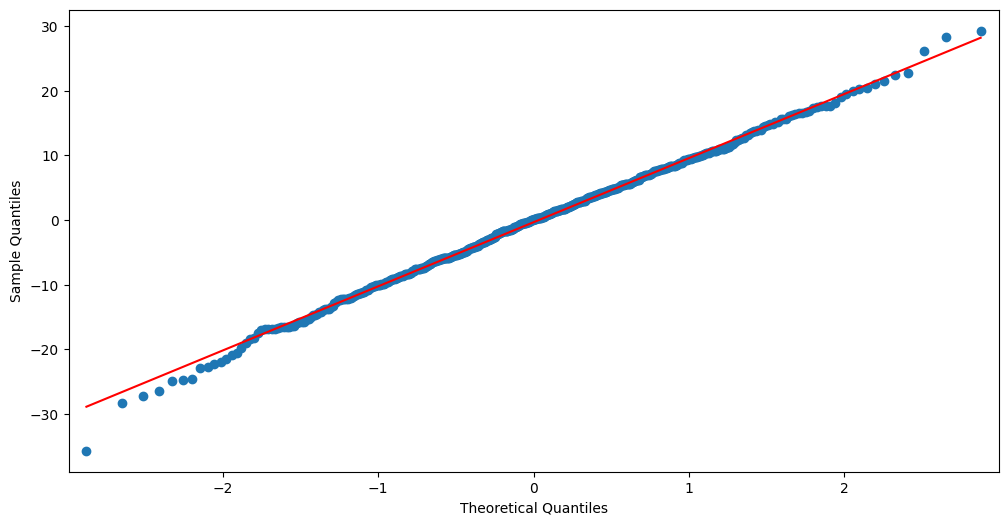

In [ ]:
mu = 250
sigma = 10

iter_size = 500
sample_size = 1000

x = norm(loc=mu, scale=sigma).rvs(size=[iter_size, sample_size])
norm_approx_list = []

for i in range(iter_size):
    mu_est = solution(x[i])
    norm_approx_list.append(np.sqrt(sample_size) * (mu_est - mu))

fig, ax = plt.subplots(figsize=(12, 6))
fig = qqplot(np.array(norm_approx_list), dist=norm, line="s", ax=ax)
plt.show()

# Бонус: почему среднее - не всегда лучшая оценка

## Пример выбора точечной оценки

Пусть $X_i \sim R[0, \theta]$, $\theta > 0$ - неизвестный параметр.
Как можно оценить $g(\theta) = \theta / 2$?
$$
\varphi(x) = \overline{x},
\quad \psi(x) = x_{(n)} / 2.
$$

### Свойства оценки $\varphi$

* $\mathbb{E}_{\theta} \varphi(X_1, \ldots, X_n) 
= \sum_{i=1}^n \mathbb{E}_{\theta} X_i / n
= \theta / 2 = g(\theta)$.
* $\mathbb{D}_{\theta} \varphi(X_1, \ldots, X_n) 
= \sum_{i=1}^n \mathbb{D}_{\theta} X_i / n^2
= \theta^2 / (12 n)$.

### Свойства оценки $\psi$
$$
\mathbb{P}_{\theta}(\psi(X_1, \ldots, X_n) \leq t)
= \mathbb{P}_{\theta}(X_1 \leq 2 t, \ldots, X_n \leq 2 t)
= \mathbb{P}_{\theta}^n(X_1 \leq 2 t) = \frac{(2 t)^n}{\theta^n}, \; t \in [0, \theta / 2].
$$

* $\mathbb{E}_{\theta} \psi(X_1, \ldots, X_n) 
= n 2^n \theta^{-n} \int_0^{\theta / 2} t^n dt
= g(\theta) n / (n+1)$.
* $\mathbb{D}_{\theta} \psi(X_1, \ldots, X_n) 
= n 2^n \theta^{-n} \int_0^{\theta / 2} t^{n+1} dt - (\theta / 2)^2 (n / (n+1))^2
= (\theta / 2)^2 (n / (n+2) - (n / (n+1))^2)
= n \theta^2 / (4 (n+1)^2 (n+2))$.

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

from scipy.stats import uniform

theta = 3
sample_size = 10000

x = uniform.rvs(loc=0, scale=theta, size=sample_size)
phi_absolute_error_list = []
psi_absolute_error_list = []

for size in range(1, sample_size+1):
    phi_absolute_error_list.append(np.abs(x[:size].mean() - theta / 2))
    psi_absolute_error_list.append(np.abs(x[:size].max() / 2 - theta / 2))

fig = go.Figure()
fig.add_trace(go.Scatter(x=1 + np.arange(sample_size), 
                         y=phi_absolute_error_list, 
                         name="Оценка средним"))
fig.add_trace(go.Scatter(x=1 + np.arange(sample_size), 
                         y=psi_absolute_error_list, 
                         name="Оценка максимумом"))

fig.update_xaxes(type="log")
fig.update_yaxes(type="log")
fig.update_layout(title="Сравнение оценок",
                  xaxis_title="Размер выборки",
                  yaxis_title="Абсолютная погрешность")
fig.show()

## Лучше, чем выборочное среднее

Пусть $\widetilde{\psi}(x) := (n+1) \psi(x) / n$.
Тогда:
* оценка $\widetilde{\psi}(x)$ является несмещённой 
($\mathbb{E}_{\theta} \widetilde{\psi}(X_1, \ldots, X_n)
= ((n+1) / n) \mathbb{E}_{\theta} \psi(X_1, \ldots, X_n) = g(\theta)$),
* у оценки $\widetilde{\psi}(x)$ дисперсия меньше, чем у $\varphi(x) = \overline{x}$.